In [24]:
import requests
import json
import numpy as np

with open('weather_data.json', 'r', encoding='utf-8') as file:
    data_json = json.load(file)
# Specify the target location name
target_location_name = "淡水區"

# Create a dictionary to store location information
location_info = {}

# Iterate through the data to find the target location
for dataset_entry in data_json:
    if dataset_entry["locationsName"] == "新北市":
        for location_entry in dataset_entry["location"]:
            if location_entry["locationName"] == target_location_name:
                # Extract information for the desired location
                location_info[target_location_name] = {
                    "geocode": location_entry["geocode"],
                    "lat": location_entry["lat"],
                    "lon": location_entry["lon"],
                    "weatherElements": []
                }

                # Iterate through weather elements
                for weather_element in location_entry["weatherElement"]:
                    element_info = {
                        "elementName": weather_element["elementName"],
                        "description": weather_element["description"],
                        "time": []
                    }

                    # Iterate through time entries for the weather element
                    for time_entry in weather_element["time"]:
                        time_info = {
                            "startTime": time_entry["startTime"],
                            "endTime": time_entry["endTime"],
                            "value": time_entry["elementValue"][0]["value"],
                            "measures": time_entry["elementValue"][0]["measures"]
                        }
                        element_info["time"].append(time_info)

                    # Add weather element information to the location
                    location_info[target_location_name]["weatherElements"].append(element_info)

# Print the extracted information for the target location
print(location_info)

{'淡水區': {'geocode': '65000100', 'lat': '25.188869', 'lon': '121.43572', 'weatherElements': [{'elementName': 'PoP12h', 'description': '12小時降雨機率', 'time': [{'startTime': '2023-12-01 18:00:00', 'endTime': '2023-12-02 06:00:00', 'value': '30', 'measures': '百分比'}, {'startTime': '2023-12-02 06:00:00', 'endTime': '2023-12-02 18:00:00', 'value': '30', 'measures': '百分比'}, {'startTime': '2023-12-02 18:00:00', 'endTime': '2023-12-03 06:00:00', 'value': '30', 'measures': '百分比'}, {'startTime': '2023-12-03 06:00:00', 'endTime': '2023-12-03 18:00:00', 'value': '30', 'measures': '百分比'}, {'startTime': '2023-12-03 18:00:00', 'endTime': '2023-12-04 06:00:00', 'value': '50', 'measures': '百分比'}, {'startTime': '2023-12-04 06:00:00', 'endTime': '2023-12-04 18:00:00', 'value': '80', 'measures': '百分比'}, {'startTime': '2023-12-04 18:00:00', 'endTime': '2023-12-05 06:00:00', 'value': '90', 'measures': '百分比'}, {'startTime': '2023-12-05 06:00:00', 'endTime': '2023-12-05 18:00:00', 'value': ' ', 'measures': '百分比'},

In [25]:
data = location_info
pop12h_values = [float(entry['value']) if entry['value'].isdigit() else np.nan for entry in data['淡水區']['weatherElements'][0]['time']]
print(f"The PoP12h values are: {pop12h_values}")

The PoP12h values are: [30.0, 30.0, 30.0, 30.0, 50.0, 80.0, 90.0, nan, nan, nan, nan, nan, nan, nan, nan]


In [38]:
pop12h_values = [float(entry['value']) if entry['value'].isdigit() else np.nan for entry in data['淡水區']['weatherElements'][5]['time']]
print(f"The MaxAT values are: {pop12h_values}")

The MaxAT values are: [11.0, 18.0, 18.0, 20.0, 19.0, 23.0, 20.0, 20.0, 19.0, 21.0, 19.0, 21.0, 18.0, 22.0, 19.0]


In [39]:
pop12h_values = [int(entry['value']) if entry['value'].isdigit() else entry['value'] for entry in data['淡水區']['weatherElements'][6]['time']]
print(f"The Wx values are: {pop12h_values}")

The Wx values are: ['陰短暫雨', '多雲時陰短暫雨', '多雲短暫雨', '陰短暫雨', '陰短暫雨', '陰短暫雨', '陰短暫雨', '多雲', '多雲', '陰時多雲短暫雨', '多雲', '多雲', '多雲', '多雲', '多雲']


[15.0, 18.0, 18.0, 19.0, 18.0, 19.0, 18.0, 19.0, 18.0, 19.0, 17.0, 19.0, 17.0, 20.0, 19.0]
['2023-12-01 18:00:00', '2023-12-02 06:00:00', '2023-12-02 06:00:00', '2023-12-02 18:00:00', '2023-12-02 18:00:00', '2023-12-03 06:00:00', '2023-12-03 06:00:00', '2023-12-03 18:00:00', '2023-12-03 18:00:00', '2023-12-04 06:00:00', '2023-12-04 06:00:00', '2023-12-04 18:00:00', '2023-12-04 18:00:00', '2023-12-05 06:00:00', '2023-12-05 06:00:00', '2023-12-05 18:00:00', '2023-12-05 18:00:00', '2023-12-06 06:00:00', '2023-12-06 06:00:00', '2023-12-06 18:00:00', '2023-12-06 18:00:00', '2023-12-07 06:00:00', '2023-12-07 06:00:00', '2023-12-07 18:00:00', '2023-12-07 18:00:00', '2023-12-08 06:00:00', '2023-12-08 06:00:00', '2023-12-08 18:00:00', '2023-12-08 18:00:00', '2023-12-09 06:00:00']


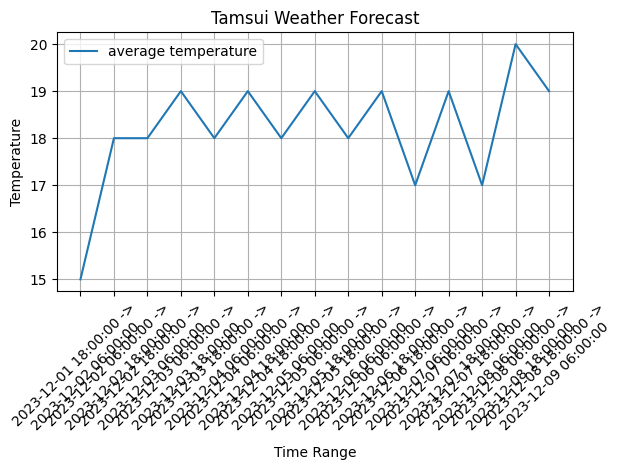

In [42]:
import matplotlib.pyplot as plt
#average temp plot
#平均溫度
average_temp = [float(entry['value']) if entry['value'].isdigit() else np.nan for entry in data['淡水區']['weatherElements'][1]['time']]
#時間戳
timestamps = [timestamp for entry in data['淡水區']['weatherElements'][0]['time'] for timestamp in (entry['startTime'], entry['endTime'])]
formatted_x = [f'{start} ->\n{end}' for start, end in zip(timestamps[::2], timestamps[1::2])]
y_temp = average_temp
print(average_temp)
print(timestamps)
# Create a plot with labels and title
plt.plot(formatted_x, y_temp, label='average temperature')
plt.xlabel('Time Range')
plt.ylabel('Temperature')
plt.title('Tamsui Weather Forecast')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add grid lines and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

RuntimeError: asyncio.run() cannot be called from a running event loop